## Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework by analyzing a dataset that the government received from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

### Objective

1. What are the different factors that influence the income of an individual?

2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

## EDA and preprocessing approach:
1. load libraries and data
2. check for null values
3. check for numerical and categorical varirables
4. UNIVARIATE ANALYSIS
    - check for skewness of numerical vairables
    - check for outliers and treat outliers
    - check for cardinality of categorical vairables
5. BIVARIATE ANALYSIS
    - check for relation with the dependant vairable


# Loading Libraries and importing dataset

In [3]:
# Visualisation and dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# train-test-split, scaling, encoding 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# metrics
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                            recall_score,
                            precision_score, 
                            f1_score,
                            precision_recall_curve,
                            precision_recall_fscore_support, 
                            classification_report, 
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            plot_confusion_matrix)


# Warnings
import warnings

warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_colwidth',None)

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

In [4]:
data = pd.read_csv("who_data.csv")

In [5]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

# EDA and Data Preprocessing

In [6]:
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* The dataset has 32561 rows and 14 columns 

In [7]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education-no. of years    0
marital status            0
occupation                0
relationship              0
race                      0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
native-country            0
salary                    0
dtype: int64

- there are no null values in the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-no. of years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working hours per week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital gain            32561 non-null  int64 
 11  capital loss            32561 non-null  int64 
 12  working hours per week  32561 non-null  int64 
 13  native-country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [10]:
# checking for categorical variables
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
print(len(categorical))
print(categorical)

9
['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


In [11]:
# checking for numerical variables
numerical = [feature for feature in df.columns if feature not in categorical]
print(len(numerical))
print(numerical)

6
['age', 'fnlwgt', 'education-no. of years', 'capital gain', 'capital loss', 'working hours per week']


- There are a total of **`9 categorical`** features and **`6 numerical features`**

In [12]:
for feature in categorical:
    print(feature, df[feature].value_counts())
    print('-'*60)

workclass  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
------------------------------------------------------------
education  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
------------------------------------------------------------
marital status  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spo

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* The distinct levels of marital_status can also be reduced.

#### Replacing ? with 'Unknown'

In [13]:
df.workclass = df.workclass.apply(lambda x: "Unknown" if x == " ?" else x)
df['native-country'] = df['native-country'].apply(lambda x: "Unknown" if x == " ?" else x)
df.occupation = df.occupation.apply(lambda x: "Unknown" if x == " ?" else x)

#### Reducing the number of distinct values in marital_status

In [14]:
df['marital status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
df['marital status'] = df['marital status'].str.replace(
    " ", ""
)  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [16]:
df['marital status'] = df['marital status'].apply(reduce_marital_status)

In [17]:
df['marital status'].unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

#### Converting native-countries to continents for reducing features and ease

In [18]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [19]:
# remove empty spaces from strings
df['native-country'] = df['native-country'].str.replace(
    " ", ""
)  

In [20]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

df['native-country'] = df['native-country'].apply(region_combining)

In [21]:
df['native-country'].value_counts()

north_america    30588
asia               671
other              663
europe             521
south_america      118
Name: native-country, dtype: int64


## Univariate Analysis
This is done for checking the skewness of the data

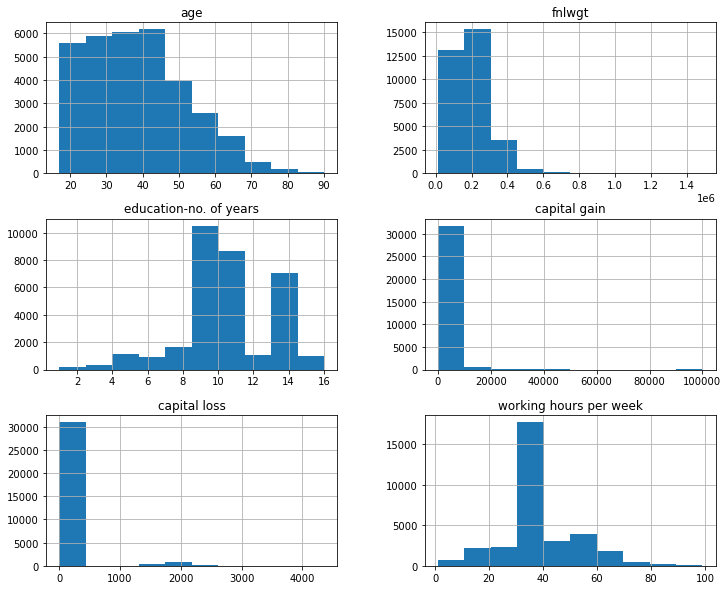

In [22]:
df[numerical].hist(figsize=(12,10))
plt.show()

- `Age`, `fnwlgt`, `capital_gain`, and `capital_loss` are right skewed.
- This can be treated by handling the outliers 

#### Checking outliers

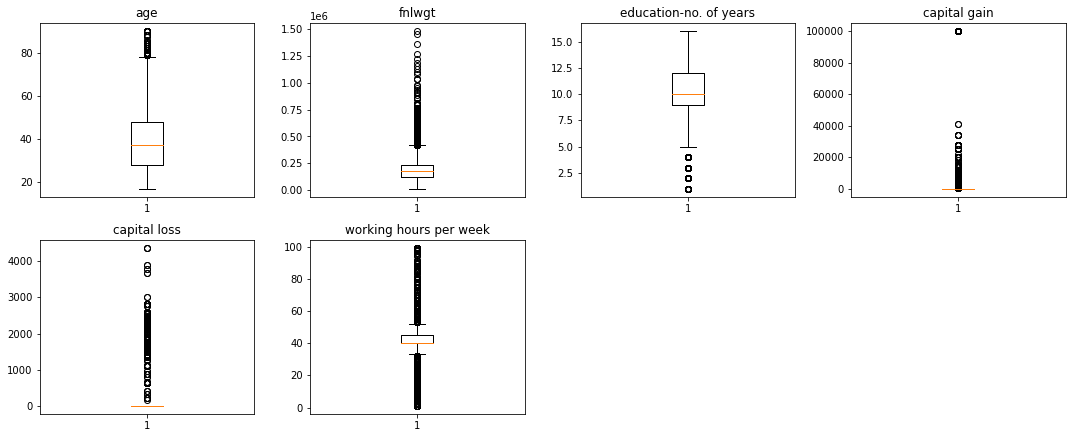

In [23]:
def check_outliers(df):
    plt.figure(figsize=(15, 15))

    for i, variable in enumerate(numerical):
        plt.subplot(5, 4, i + 1)
        plt.boxplot(df[variable], whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

check_outliers(df)

#### Treating outliers

In [24]:
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

In [25]:
for feature in numerical:
    df = treat_outliers(df, feature)

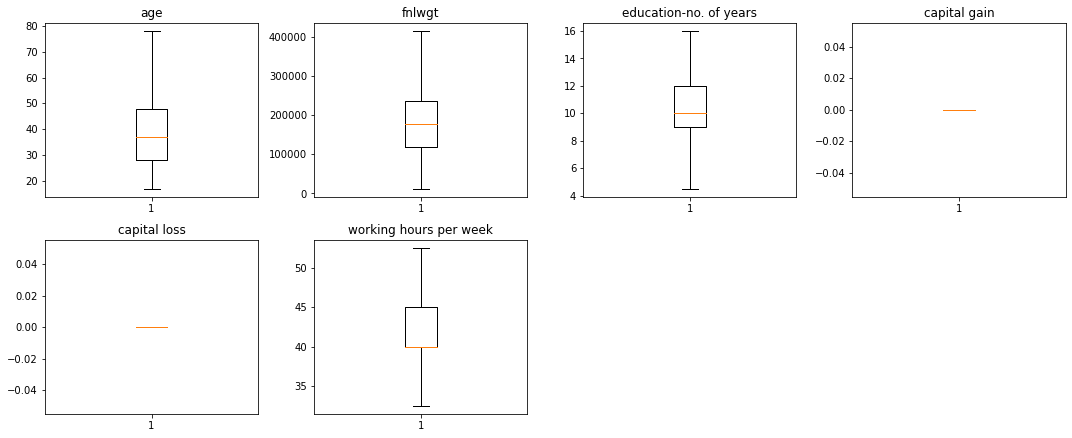

In [26]:
# checking if the outliers have been treated or not
check_outliers(df)

- removing capital loss and capital gain since most of the observations become 0 after outlier removal

In [27]:
df.drop(['capital loss', 'capital gain'], inplace = True, axis = 1)
numerical.remove('capital loss')
numerical.remove('capital gain')

#### For categorical variables 

In [28]:
# checking cardinality of most frquent categories in every categorical feature
def distribution(feature, perc=True, data=df):
    percent = df[feature].value_counts() / len(df)
    return percent * 100 if perc else percent

In [29]:
for i in categorical:
    print(i.upper())
    print(distribution(i)[:5])
    print()

WORKCLASS
 Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
Unknown               5.638647
 State-gov            3.986364
Name: workclass, dtype: float64

EDUCATION
 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
Name: education, dtype: float64

MARITAL STATUS
married          46.064310
Never-married    32.809189
not_married      21.126501
Name: marital status, dtype: float64

OCCUPATION
 Prof-specialty     12.714597
 Craft-repair       12.588680
 Exec-managerial    12.487331
 Adm-clerical       11.578268
 Sales              11.209729
Name: occupation, dtype: float64

RELATIONSHIP
 Husband          40.517797
 Not-in-family    25.505973
 Own-child        15.564633
 Unmarried        10.583213
 Wife              4.815577
Name: relationship, dtype: float64

RACE
 White                 85.427352
 Black                  9.594300
 Asian-Pac-Islander     3.190934
 A

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.
* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.
* 89% of the people are native to United States
* 24% of the observations have a salary above 50K and while 76% have a salary below 50K

## Bivariate analysis
For checking correlation

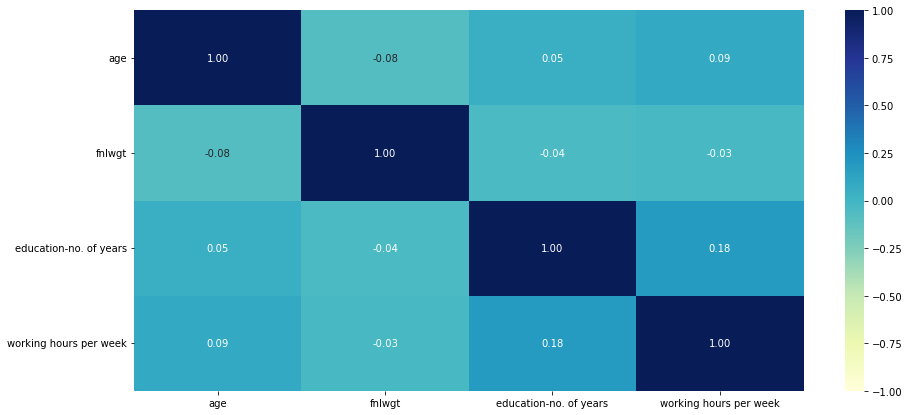

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

* There is no significant correlation between the columns.

### For numerical variables

In [31]:
def stacked_barplot(data, predictor, target):
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    

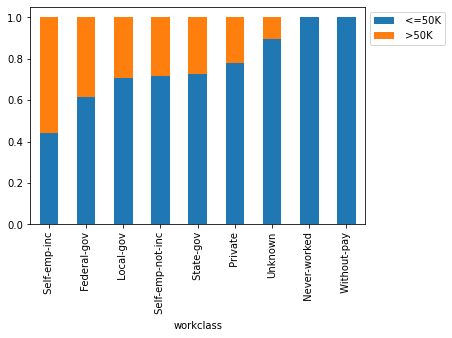

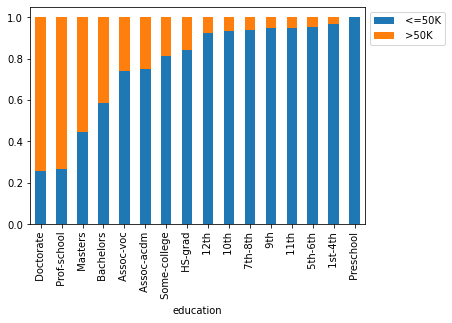

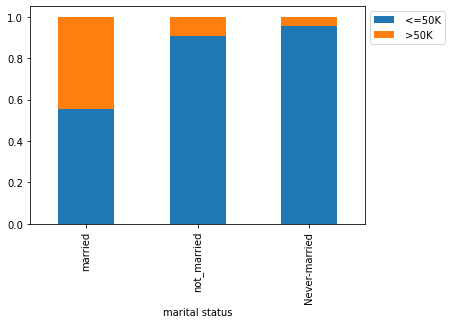

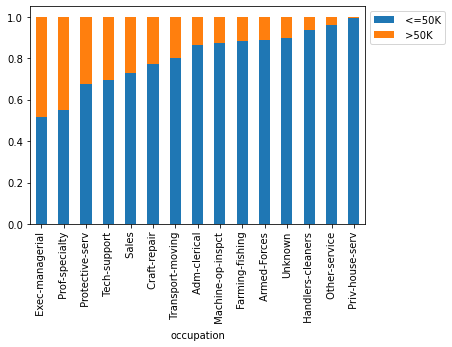

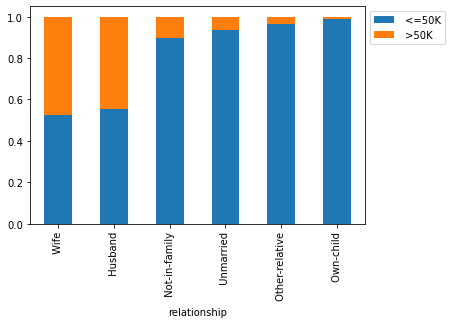

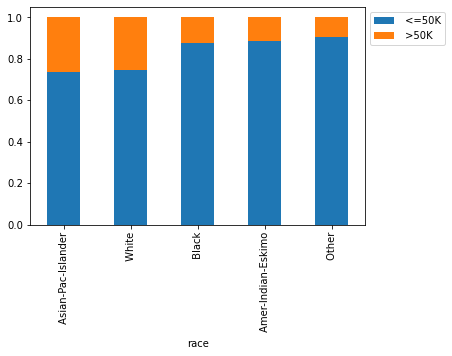

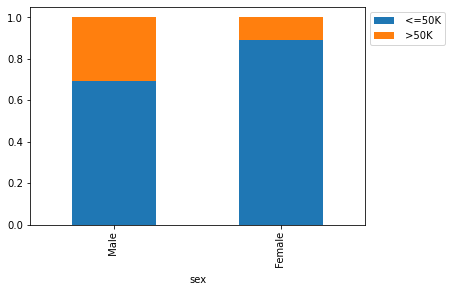

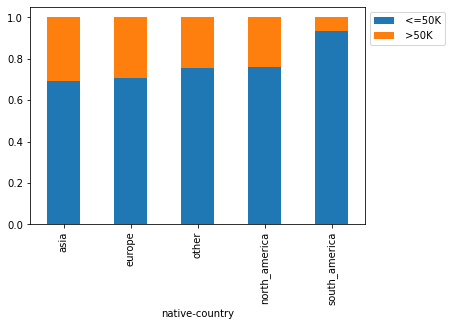

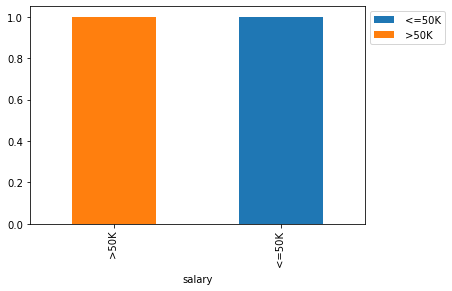

In [32]:
for feature in categorical:
    stacked_barplot(df, feature, "salary")

* **~25% of the males have salary >50K whereas only ~15% of the females have salary >50K**
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.


* **~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K**
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.



- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- **People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary**


* **25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race**



* **Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people**


* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* **~20% of the people working in the private sector earn more than 50K**

In [33]:
df.groupby('salary')['age'].mean()

salary
 <=50K    36.754854
 >50K     44.232751
Name: age, dtype: float64

In [34]:
df.groupby('salary')['working hours per week'].mean()

salary
 <=50K    40.257969
 >50K     44.180079
Name: working hours per week, dtype: float64

In [35]:
df.groupby('salary')['education-no. of years'].mean()

salary
 <=50K     9.650162
 >50K     11.619181
Name: education-no. of years, dtype: float64

- Aerage **`age`** of people earning **more than 50k is 44 years** and for those earning **less than 50k is 36 years**
- Those who **`earn`**  **more than 50k work for around 45 hours** per week and those who earn **less than 50k work for around 38 hours**
- Those who **`earn`**  **more than 50k**, have studied around **11 years** and those earning **less than 50k**, have studied around **9 years**

# Data Preparation
1. Label Encode saray to Binary format
2. Prepare X and y for model training and create training and testing sets
3. Decide model performance criteria
4. Training model
5. Evaluation metrics on train and test sets
    - Accuracy, precision, recall and F1 scores
    - ROC-AUC graphs and score
6. Improve model performance
    - Using AUC-ROC curve
    - Using Precision-Recall curve

## 1. Encoding Salary into Binary label

In [36]:
df["salary"] = df["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

In [37]:
df.salary.value_counts()

1    24720
0     7841
Name: salary, dtype: int64

## 2. Preparing X and Y and train-test-split

In [38]:
X = df.drop(["salary"], axis=1)
Y = df["salary"]

# for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [39]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (22792, 57)
Shape of test set :  (9769, 57)


## 3. Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?**
* Both the cases are important as:

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


**How to reduce this loss i.e need to reduce False Negatives?**
*  **`f1_score`** should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

## 4. Training Model

## Logistic Regression
In the code cell below, we will train the logistics regression model on X_train and y_train with .fit() function

In [40]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

**Finding the coefficients**

In the code cell below, we have calculated the coeficients of the regression equation passed in the logistic regression function. These coefficients indicate the impact of each variable on the prediction. A dataframe has been made inorder to show the coefficients corresponsing to every feature/variable

In [41]:
# let us check the coefficients and intercept of the model
pd.DataFrame(lg.coef_,columns=X.columns,index = ['Coeff']).T.sort_values(by='Coeff',ascending=False).head(10)

,Coeff
native-country_south_america,1.291366
occupation_ Priv-house-serv,1.104090
workclass_ Without-pay,1.036782
occupation_ Other-service,0.915059
relationship_ Own-child,0.911937
workclass_ Self-emp-not-inc,0.898076
occupation_ Farming-fishing,0.871997
education_ Preschool,0.685706
occupation_Unknown,0.679077
workclass_ State-gov,0.637436


- The above 10 features are the ones that are **`positively related`** with the salary
- Increase in these features will increase in chances of a person having salary <=50K.

In [42]:
pd.DataFrame(lg.coef_,columns=X.columns,index = ['Coeff']).T.sort_values(by='Coeff',ascending=False).tail(10)

,Coeff
race_ Asian-Pac-Islander,-0.383771
marital status_not_married,-0.418022
education_ Prof-school,-0.424818
occupation_ Prof-specialty,-0.505308
occupation_ Protective-serv,-0.544586
occupation_ Tech-support,-0.602203
sex_ Male,-0.763088
occupation_ Exec-managerial,-0.793704
relationship_ Wife,-1.389544
marital status_married,-2.161862


- The above 10 features are the ones that are **`negatively related`** with the salary
- Increase in these features will decrease in chances of a person having salary <=50K.

**Converting coefficients to odds**

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [43]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).head(10)

,Odds,Change_odd%
age,0.970989,-2.901103
fnlwgt,0.999999,-0.000085
education-no. of years,0.744307,-25.569317
working hours per week,0.934503,-6.549703
workclass_ Local-gov,1.881041,88.104071
workclass_ Never-worked,1.250332,25.033209
workclass_ Private,1.532863,53.286327
workclass_ Self-emp-inc,1.096134,9.613378
workclass_ Self-emp-not-inc,2.454876,145.487561
workclass_ State-gov,1.891624,89.162367


**Coefficient interpretations**
- The change in odds represent the increase/decrease in the odds of a person having a salaray of <=50k.
- Hence by keeping all the features constant, a 1 unit change in the particular feature will increase/decrease the chance of a person having a salary <=50K based on the odds and Changed_odds% of that feature

## 5. Evaluation metrics

In [44]:
# predicting labels
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

In [45]:
# predicting probablities
y_prob_train = lg.predict_proba(X_train)[:,1]
y_prob_test = lg.predict_proba(X_test)[:,1]

In [46]:
# Since we need the model performance based on the threshold value, we will make this function
# This function will make labels for our dependant variables based on the threshold passed

def model_performance(target, pred_prob, threshold=0.5):
    
    pred_thresh = pred_prob > threshold
    pred = np.round(pred_thresh)
    
    acc = accuracy_score(target, pred) 
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred) 

    # creating a dataframe of metrics
    df_score = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=['Score'],
    )

    return df_score.T

In [47]:
print('TRAINING SET')
lg_train = model_performance(y_train, y_prob_train)
lg_train

TRAINING SET


,Score
Accuracy,0.834328
Recall,0.921083
Precision,0.867241
F1,0.893351


In [48]:
print("TEST SET")
lg_test = model_performance(y_test, y_prob_test)
lg_test

TEST SET


,Score
Accuracy,0.838980
Recall,0.917616
Precision,0.879299
F1,0.898049


### ROC-AUC curve

Here we will be checking the ROC-AUC score for the training set. This score will give us the evaluation of our model based on the TPR(true Positive Rate) and FPR(False positive rate)

We would want a model with a high TPR and a lesser FPR. Therefore from the below curve, we can select an optimal model threshold inorder to get a good model with less FPR and high TPR

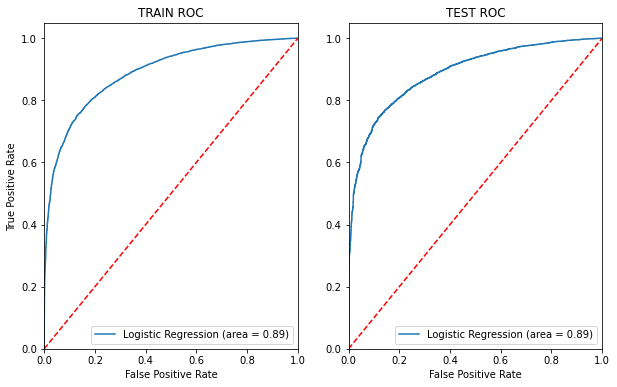

In [49]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
logit_roc_auc_train = roc_auc_score(y_train, y_prob_train)
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TRAIN ROC")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
logit_roc_auc_test = roc_auc_score(y_test, y_prob_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.title("TEST ROC")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance sine the **`AUC is 0.89`** on both test and trainig set

## 6. Model Performance Improvement

## Using Optimal threshold from AUC-ROC curve
Now, we will find the optimal threshold using the AUC-ROC curve. This threshold is choosen based on a model that has a high TPR and a low FPR

In [50]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7757062409980053


**Model performance with optimal `threshold = 0.775`**

In [51]:
print('TRAINING SET')
lg_train_thresh1 = model_performance(y_train, y_prob_train, threshold=0.775)
lg_train_thresh1

TRAINING SET


,Score
Accuracy,0.780449
Recall,0.751310
Precision,0.946164
F1,0.837554


In [52]:
print("TEST SET")
lg_test_thresh1 = model_performance(y_test, y_prob_test, threshold = 0.775)
lg_test_thresh1

TEST SET


,Score
Accuracy,0.779814
Recall,0.752980
Precision,0.952102
F1,0.840914


* The **`precision`** of the model for both training and test set **has improved** but the **`F1-score` has reduced**

## Using Optimal Threshold from Precision-Recall Curve

We will plot the change in precision and the recall for different values of threshold. The threshold value that gives the best precision-recall balance(intersection point between the curves), is the best threshold value

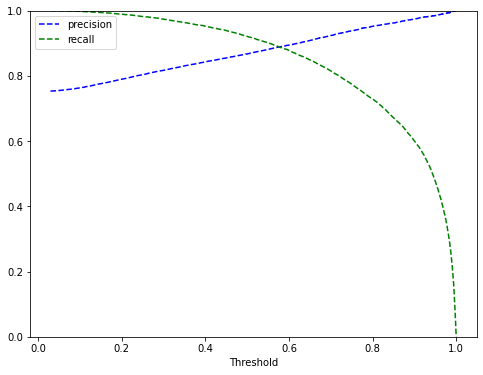

In [53]:
prec, rec, tre = precision_recall_curve(y_train,y_prob_train)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(8, 6))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of **`0.58`**, we get balanced recall and precision.

In [54]:
optimal_threshold = 0.58

**Model performance with optimal `threshold = 0.58`**

In [55]:
print('TRAINING SET')
lg_train_thresh2 = model_performance(y_train, y_prob_train, threshold=0.58)
lg_train_thresh2

TRAINING SET


,Score
Accuracy,0.831739
Recall,0.886954
Precision,0.889389
F1,0.888170


In [56]:
print("TEST SET")
lg_test_thresh2 = model_performance(y_test, y_prob_test, threshold = 0.58)
lg_test_thresh2

TEST SET


,Score
Accuracy,0.831508
Recall,0.880927
Precision,0.899027
F1,0.889885


- The **precision and recall has increased** for both the train and test sets
- Hence a **threshold of 0.58 is a better choice**

# Model Performance Summary
Here in this section we will summarize the model performance in a tabular format(dataframe) based on the results achieved from selecting different threshold values.

In [141]:
# training performance comparison

lg_perf_train = pd.concat(
    [
        lg_train,
        lg_train_thresh1,
        lg_train_thresh2
    ],
    axis=1,
)
lg_perf_train.columns = [
    "Default Threshold",
    "0.77 Threshold",
    "0.58 Threshold"
]
print("TRAINING PERFORMANCE:")
lg_perf_train

TRAINING PERFORMANCE:


,Default Threshold,0.77 Threshold,0.58 Threshold
Accuracy,0.834328,0.780449,0.831739
Recall,0.921083,0.751310,0.886954
Precision,0.867241,0.946164,0.889389
F1,0.893351,0.837554,0.888170


In [142]:
# testing performance comparison

lg_perf_test = pd.concat(
    [
        lg_test,
        lg_test_thresh1,
        lg_test_thresh2
    ],
    axis=1,
)
lg_perf_test.columns = [
    "Default Threshold",
    "0.77 Threshold",
    "0.58 Threshold"
]
print("TEST PERFORMANCE:")
lg_perf_test

TEST PERFORMANCE:


,Default Threshold,0.77 Threshold,0.58 Threshold
Accuracy,0.838980,0.779814,0.831508
Recall,0.917616,0.752980,0.880927
Precision,0.879299,0.952102,0.899027
F1,0.898049,0.840914,0.889885


### Conclusion
- We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly. 
* Coefficient of age, fnlwgt, education_no_of_years,working_hours_per_week,sex_Male, some levels of education and marital_status, occupation, race and native country are negative, increase in these will lead to decrease in chances of a person having <=50K salary. 
* Coefficient all the levels of workclass,some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.

### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [100]:
rf = RandomForestClassifier(max_depth=3,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1)

In [101]:
# predicting labels
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [102]:
# predicting probabilities
y_prob_train = rf.predict_proba(X_train)[:, 1]
y_prob_test = rf.predict_proba(X_test)[:, 1]

### Model performance with 0.5 threshold

In [143]:
rf_train = model_performance(y_train, y_prob_train)
rf_train

,Score
Accuracy,0.784047
Recall,0.993710
Precision,0.779941
F1,0.873944


In [144]:
rf_test = model_performance(y_test, y_prob_test)
rf_test

,Score
Accuracy,0.796192
Recall,0.991126
Precision,0.795471
F1,0.882585


### Finding Optimal threshold using AUC-ROC curve

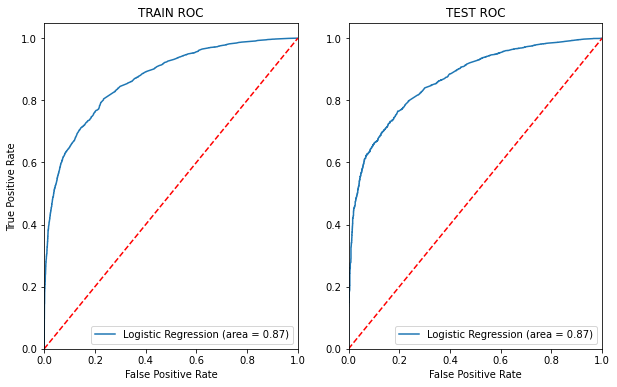

In [136]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
logit_roc_auc_train = roc_auc_score(y_train, y_prob_train)
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TRAIN ROC")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
logit_roc_auc_test = roc_auc_score(y_test, y_prob_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.title("TEST ROC")
plt.legend(loc="lower right")
plt.show()

In [125]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6912218455195499


### Model performance with 0.6912 threshold

In [151]:
rf_train_thresh1 = model_performance(y_train, y_prob_train, threshold=0.6912)
rf_train_thresh1

,Score
Accuracy,0.795016
Recall,0.804718
Precision,0.912857
F1,0.855383


In [152]:
rf_test_thresh1 = model_performance(y_test, y_prob_test, threshold=0.6912)
rf_test_thresh1

,Score
Accuracy,0.789538
Recall,0.797086
Precision,0.919902
F1,0.854102


### Finding Optimal threshold using Precision-Recall curve

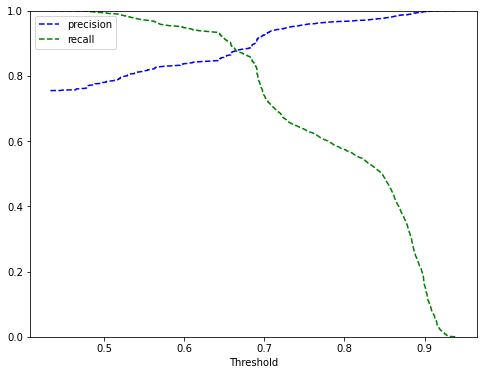

In [129]:
prec, rec, tre = precision_recall_curve(y_train,y_prob_train)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(8, 6))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Model performance with 0.66 threshold

In [153]:
rf_train_thresh2 = model_performance(y_train, y_prob_train, threshold=0.66)
rf_train_thresh2

,Score
Accuracy,0.818928
Recall,0.887595
Precision,0.874004
F1,0.880747


In [154]:
rf_test_thresh2 = model_performance(y_test, y_prob_test, threshold=0.66)
rf_test_thresh2

,Score
Accuracy,0.817484
Recall,0.879338
Precision,0.883904
F1,0.881615


In [158]:
# training performance comparison

rf_perf_train = pd.concat(
    [
        rf_train,
        rf_train_thresh1,
        rf_train_thresh2
    ],
    axis=1,
)
rf_perf_train.columns = [
    "Default Threshold",
    "0.69 Threshold",
    "0.66 Threshold"
]
print("TRAINING PERFORMANCE:")
rf_perf_train

TRAINING PERFORMANCE:


,Default Threshold,0.69 Threshold,0.66 Threshold
Accuracy,0.784047,0.795016,0.818928
Recall,0.993710,0.804718,0.887595
Precision,0.779941,0.912857,0.874004
F1,0.873944,0.855383,0.880747


In [159]:
# Test performance comparison

rf_perf_test = pd.concat(
    [
        rf_test,
        rf_test_thresh1,
        rf_test_thresh2
    ],
    axis=1,
)
rf_perf_test.columns = [
    "Default Threshold",
    "0.69 Threshold",
    "0.66 Threshold"
]
print("TEST PERFORMANCE:")
rf_perf_test

TEST PERFORMANCE:


,Default Threshold,0.69 Threshold,0.66 Threshold
Accuracy,0.796192,0.789538,0.817484
Recall,0.991126,0.797086,0.879338
Precision,0.795471,0.919902,0.883904
F1,0.882585,0.854102,0.881615


# COMPARING MODEL PERFORMANCE

In [160]:
rf_perf_test

,Default Threshold,0.69 Threshold,0.66 Threshold
Accuracy,0.796192,0.789538,0.817484
Recall,0.991126,0.797086,0.879338
Precision,0.795471,0.919902,0.883904
F1,0.882585,0.854102,0.881615


In [161]:
lg_perf_test

,Default Threshold,0.77 Threshold,0.58 Threshold
Accuracy,0.838980,0.779814,0.831508
Recall,0.917616,0.752980,0.880927
Precision,0.879299,0.952102,0.899027
F1,0.898049,0.840914,0.889885


As we can compare the test performance of both the models, we can see that Logistic Regression outperforms the Random Forest Model in terms of the F1-score